# **Assignment** - Bike Sharing

# Description of the dataset

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

# PART I: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

> Loading the data

In [2]:
data = pd.read_csv("bike-sharing_hourly.csv")

In [3]:
data.sample()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
1797     1798  2011-03-20       1   0     3  14        0        0           0   

      weathersit  temp   atemp  hum  windspeed  casual  registered  cnt  
1797           1   0.4  0.4091  0.3        0.0     145         134  279

> Exploring the columns' values, dataypes and potential null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
data.describe().T

count         mean          std   min        25%        50%  \
instant     17379.0  8690.000000  5017.029500  1.00  4345.5000  8690.0000   
season      17379.0     2.501640     1.106918  1.00     2.0000     3.0000   
yr          17379.0     0.502561     0.500008  0.00     0.0000     1.0000   
mnth        17379.0     6.537775     3.438776  1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405  0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165  0.00     0.0000     0.0000   
weekday     17379.0     3.003683     2.005771  0.00     1.0000     3.0000   
workingday  17379.0     0.682721     0.465431  0.00     0.0000     1.0000   
weathersit  17379.0     1.425283     0.639357  1.00     1.0000     1.0000   
temp        17379.0     0.496987     0.192556  0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850  0.00     0.3333     0.4848   
hum         17379.0     0.627229     0.192930  0.00     0.4800     0.6300   
windspeed   17379.0     0.190098     0.122340  0.00     0.1045     0.1940   
casual      17379.0    35.676218    49.305030  0.00     4.0000    17.0000   
registered  17379.0   153.786869   151.357286  0.00    34.0000   115.0000   
cnt         17379.0   189.463088   181.387599  1.00    40.0000   142.0000   

                   75%         max  
instant     13034.5000  17379.0000  
season          3.0000      4.0000  
yr              1.0000      1.0000  
mnth           10.0000     12.0000  
hr             18.0000     23.0000  
holiday         0.0000      1.0000  
weekday         5.0000      6.0000  
workingday      1.0000      1.0000  
weathersit      2.0000      4.0000  
temp            0.6600      1.0000  
atemp           0.6212      1.0000  
hum             0.7800      1.0000  
windspeed       0.2537      0.8507  
casual         48.0000    367.0000  
registered    220.0000    886.0000  
cnt           281.0000    977.0000

> Convert the "dteday" column to datetime format

In [6]:
data["dteday"] = pd.to_datetime(data["dteday"])

> Extract year, month, and day values from the "dteday" column

In [7]:
data['year'] = data['dteday'].apply(lambda x: x.year)
data['month'] = data['dteday'].apply(lambda x: x.month)
data['day'] = data['dteday'].apply(lambda x: x.day)

> Drop the "dteday", "yr", and "mnth" column since they were already extracted and reorganize the columns

In [8]:
data = data.drop(['dteday', 'yr', 'mnth'], axis=1)

data = data[['year', 'month', 'day', 'season', 'hr', 'holiday', 'weekday', 'workingday',
               'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
               'registered', 'cnt']]

> Exploring possible correlations

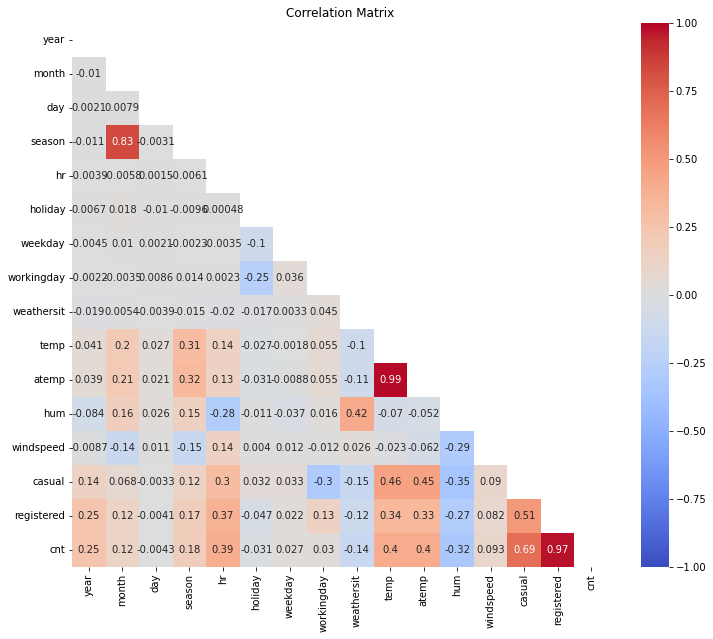

In [9]:
# Calculate the correlation matrix

corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap

# Plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax)
ax.set_title("Correlation Matrix")
plt.show()

> Computing the correlation with the target variable "cnt"

In [10]:
corr_with_cnt = data.corr()["cnt"]
print(corr_with_cnt)

year          0.250495
month         0.120638
day          -0.004312
season        0.178056
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


> Creating "day_time" column for time of the day based on "hr" (Morning = 1, Afternoon = 2, Evening = 3, Night =4)

In [11]:
# Define a function to map the hour to the corresponding time of the day

def get_time_of_day(hour):
    if hour < 6:
        return 4
    elif hour < 12:
        return 1
    elif hour < 18:
        return 2
    else:
        return 3

In [12]:
# Create a new column "time_of_day" by applying the function to the "hr" column

data["day_time"] = data["hr"].apply(get_time_of_day)

> Analysing the average values of the target variable "cnt" by season, time of the day and workday/weekend

In [13]:
season_avg_cnt = data.groupby('season')['cnt'].mean()
daytime_avg_cnt = data.groupby('day_time')['cnt'].mean()
workday_avg_cnt = data.groupby('workingday')['cnt'].mean()

print(season_avg_cnt)
print(daytime_avg_cnt)
print(workday_avg_cnt)

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64
day_time
1    208.100688
2    295.483886
3    225.757555
4     24.908559
Name: cnt, dtype: float64
workingday
0    181.405332
1    193.207754
Name: cnt, dtype: float64


### While for the average "cnt" values for season and day_time we find cosnsitent differences to be explored more in depth, the distinction between workdays and weekend does not seem to affect strongly our outcome.

> Plotting the distribution of "cnt" by season and time of the day through a bar chart 

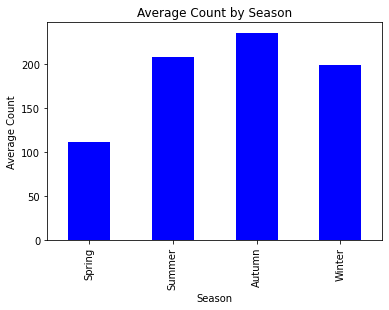

In [14]:
season_names = {1: "Spring", 2: "Summer", 3: "Autumn", 4: "Winter"}

season_avg_cnt.plot(kind="bar", color="blue")
plt.xticks(range(4), [season_names[x] for x in range(1, 5)])

plt.title("Average Count by Season")
plt.xlabel("Season")
plt.ylabel("Average Count")


plt.show()

### Susprisingly, Autumn is the season which registered the highest average values for "cnt", followed repsectively by Summer, Winter and Spring, which unexpectedly shows the lowest average values.

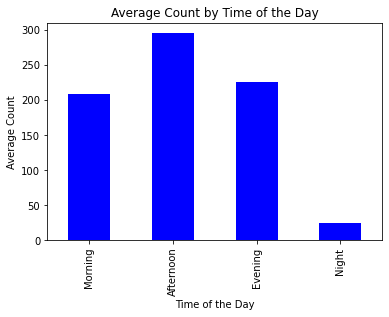

In [15]:
daytime_names = {1: "Morning", 2: "Afternoon", 3: "Evening", 4: "Night"}

daytime_avg_cnt.plot(kind="bar", color="blue")
plt.xticks(range(4), [daytime_names[x] for x in range(1, 5)])

plt.title("Average Count by Time of the Day")
plt.xlabel("Time of the Day")
plt.ylabel("Average Count")


plt.show()

### Differently from the previous ones, these ingights were more easily forecastable. In fact, most of the rides are concentrated in the Afternoon and the Evening, with very low levels during the Night.

> Plot the distribution of target variable "cnt" by perceived temperature ("atemp") and humidity ("hum") through histograms

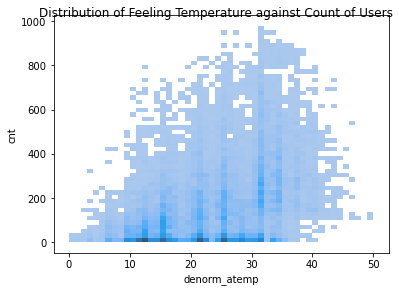

In [16]:
# De-normalizing the data for interpretability

data['denorm_atemp'] = data['atemp'] * 50

# Create a histogram plot of "denorm_atemp" against "cnt"

sns.histplot(data=data, x='denorm_atemp', y='cnt', bins=50)

plt.subplots_adjust(top=0.95)
plt.suptitle("Distribution of Feeling Temperature against Count of Users")

plt.show()

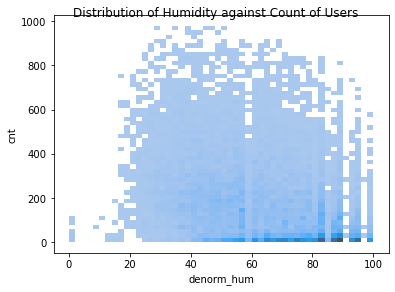

In [17]:
# De-normalizing the data for interpretability

data['denorm_hum'] = data['hum'] * 100

# Create an histogram plot of "denorm_hum" against "cnt"

sns.histplot(data=data, x='denorm_hum', y='cnt', bins=50)

plt.subplots_adjust(top=0.95)
plt.suptitle("Distribution of Humidity against Count of Users")

plt.show()

### These two histograms give us a perspective on how perceived temperature and humidity affect the total number of users. With regard to the perceived temperature, the number of users results steadily increasing from the base level of 0ºC to the peak, reached around ~32ºC, then decreasing from that point onwards. The mangitude of humidity is less clear, even though the higher the humidity, the lower the amount of users of bike-sharing services.

### The provided insights will potentially allow our client to perform a better planning of its bike-sharing services, based on season and time of the day in the longer term. While metereological conditions could empower short-term planning. These insights will also be used for the setting of our machine learning model.

> Identification of outliers

In [18]:
for col in data.columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    min_val = q1 - (1.5 * iqr)
    max_val = q3 + (1.5 * iqr)
    outliers = data[(data[col] < min_val) | (data[col] > max_val)]
    print(f'{col}: {len(outliers)} outliers')

year: 0 outliers
month: 0 outliers
day: 0 outliers
season: 0 outliers
hr: 0 outliers
holiday: 500 outliers
weekday: 0 outliers
workingday: 0 outliers
weathersit: 3 outliers
temp: 0 outliers
atemp: 0 outliers
hum: 22 outliers
windspeed: 342 outliers
casual: 1192 outliers
registered: 680 outliers
cnt: 505 outliers
day_time: 0 outliers
denorm_atemp: 0 outliers
denorm_hum: 22 outliers


> Winsorize columns with outliers

In [19]:
from scipy.stats.mstats import winsorize

# Winsorizing holiday column
data['holiday'] = winsorize(data['holiday'], limits=[0.05, 0.05])

# Winsorizing weathersit column
data['weathersit'] = winsorize(data['weathersit'], limits=[0.05, 0.05])

# Winsorizing hum column
data['hum'] = winsorize(data['hum'], limits=[0.05, 0.05])

# Winsorizing windspeed column
data['windspeed'] = winsorize(data['windspeed'], limits=[0.05, 0.05])

# Winsorizing cnt column
data['cnt'] = winsorize(data['cnt'], limits=[0.05, 0.05])

> Treatment of Categorical Features

In [20]:
# Define the columns to one-hot encode
cat_cols = ['season', 'weekday', 'weathersit']

### Note: Binary categorical features are variables that only have two possible values, such as "yes" or "no" or "0" or "1".
### In such cases, OneHotEncoding is not necessary as the information contained in the binary variable is already represented in a single column. So columns holiday and workingday will not be encoded.


In [21]:
ohe = OneHotEncoder()
encoded = ohe.fit_transform(data[cat_cols]).toarray()
ohe_data = pd.DataFrame(encoded, columns=ohe.get_feature_names(cat_cols))

/Users/ludovicogandolfi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
data = data.reset_index(drop=True)

# Concatenate the one-hot encoded columns with the original dataframe
data = pd.concat([data, ohe_data], axis=1)

# Drop the original categorical columns
data = data.drop(cat_cols, axis=1)

> Handling of temperature, humidity and windspeed features

In [23]:
# Create temperature categories
bins = [-float('inf'), 0.366, 0.61 , float('inf')]
labels = ['cold', 'mild', 'hot']
data['temp_cat'] = pd.cut(data['temp'], bins=bins, labels=labels)

# Create humidity categories
bins = [-float('inf'), 0.4, 0.7, float('inf')]
labels = ['low', 'medium', 'high']
data['hum_cat'] = pd.cut(data['hum'], bins=bins, labels=labels)

# Create windspeed categories
bins = [-float('inf'), 0.224, 0.45 , float('inf')]
labels = ['calm', 'moderate', 'windy']
data['windspeed_cat'] = pd.cut(data['windspeed'], bins=bins, labels=labels)

In [24]:
# Define the columns to one-hot encode
cat_cols = ['day_time', 'temp_cat', 'hum_cat', 'windspeed_cat']

# Convert the sparse matrix to a dense matrix
encoded_cols = ohe.fit_transform(data[cat_cols]).toarray()

# Create a new DataFrame with the encoded columns
ohe_data = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names(cat_cols))

# Concatenate the one-hot encoded columns with the original dataframe
data = pd.concat([data, ohe_data], axis=1)

# Drop the original categorical columns
data = data.drop(cat_cols, axis=1)

/Users/ludovicogandolfi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


> Computing interactions between temperature, humidity and windspeed

In [25]:
# Create interaction terms
data['temp_hum_interaction'] = data['temp'] * data['hum']
data['temp_ws_interaction'] = data['temp'] * data['windspeed']
data['ws_hum_interaction'] = data['windspeed'] * data['hum']

> Computing lagged variables

In [26]:
# Concatenate date and time into a single string with format 'yyyy-mm-dd hh:00:00'
data['datetime'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2) + '-' + data['day'].astype(str).str.zfill(2) + ' ' + data['hr'].astype(str).str.zfill(2) + ':00:00'

# Convert the string to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

# Sort the dataset by date and time
data = data.sort_values('datetime')

# Create the 'rentals_previous_hour' column
data['rentals_previous_hour'] = data['cnt'].shift(1)

# Create the 'rentals_previous_day' column
data['rentals_previous_day'] = data.groupby(['year', 'month', 'day'])['cnt'].transform('sum').shift(1)

# Create the 'rentals_previous_week' column
data['rentals_previous_week'] = data.groupby('datetime')['cnt'].transform('sum').rolling(window=168).sum().shift(1)

# Create the 'rentals_previous_month' column
data['rentals_previous_month'] = data.groupby(pd.Grouper(key='datetime', freq='1M'))['cnt'].transform('sum').shift(1)

# Drop rows with missing values
data = data.dropna()

data = data.drop('datetime', axis=1)

> Reorganize the columns as desired for the Prediction Model

In [27]:
data = data[['year', 'month', 'day', 'hr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed','temp_hum_interaction', 'temp_ws_interaction',
       'ws_hum_interaction', 'season_1', 'season_2', 'season_3', 'season_4',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'day_time_1', 'day_time_2', 'day_time_3', 'day_time_4',
       'temp_cat_cold', 'temp_cat_hot', 'temp_cat_mild', 'hum_cat_high',
       'hum_cat_low', 'hum_cat_medium', 'windspeed_cat_calm',
       'windspeed_cat_moderate', 'rentals_previous_hour', 'rentals_previous_day',
       'rentals_previous_week', 'rentals_previous_month', 'cnt']]

In [28]:
data.to_csv("data.csv", index=True)

# PART II: Prediction Model

> Creating unseen data

In [29]:
data = pd.read_csv('data.csv')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

full_data, unseen_data = train_test_split(data, test_size=0.01, random_state=42, shuffle=False)

In [31]:
unseen_data = unseen_data.drop("cnt", axis=1)

> Splitting the known data for prediction

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X = full_data.drop('cnt', axis=1) # predictor variables
y = full_data['cnt'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### We trained 5 different models, from a simple linear regression to catboost, which happened to be the best one in terms of performance on the test set. Moreover, we applied grid search to optimize the model and the following one appeared to be the one where the score on unseen data is maximized.

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
lr = LinearRegression()

# Fit the linear regression model on the training data
lr.fit(X_train, y_train)

# Generate predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R2 score:", r2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model on the training data
rf.fit(X_train, y_train)

# Generate predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R2 score:", r2)

In [ ]:
import xgboost as xgb
# Create an XGBoost object
xgb_model = xgb.XGBRegressor(n_estimators = 100, random_state=42)

# Fit the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Generate predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R2 score:", r2)

In [ ]:
import lightgbm as lgb

# Create an XGBoost object
lgb_model = lgb.LGBMRegressor(n_estimators = 100, random_state=42)

# create a LightGBM classifier
clf = lgb.LGBMClassifier()

# train the classifier on the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R2 score:", r2)

### Optional: Installl CatBoost if necessary!

In [34]:
!pip install catboost

### Based on the evaluation metrics, the Random Forest, XGBoost, and CatBoost models perform well on this regression task. The R2 score is also high for these models, indicating that they explain a large proportion of the variance in the target variable. Among these three models, the CatBoost model has the lowest RMSE, MSE, and MAE, indicating better performance in terms of prediction accuracy. Therefore, the CatBoost model would be the best choice for this regression task.

### Grid Search for our Best Model (computationally expensive - DO NOT RUN)

In [ ]:
# define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': [100, 500, 1000],
}

# create a CatBoost regressor
catboost = CatBoostRegressor()

# perform a grid search with 5-fold cross validation
grid_search = GridSearchCV(catboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# print the best parameters and score
print("GridSearchCV best parameters: ", grid_search.best_params_)
print("GridSearchCV best score: ", np.sqrt(-grid_search.best_score_))

### Back to our model tuning:

> Setting the optimal hyperparameters

In [33]:
# create a CatBoost regressor with default hyperparameters
from catboost import CatBoostRegressor
catboost = CatBoostRegressor(depth = 7, 
                             iterations = 1000, 
                             l2_leaf_reg = 9, 
                             learning_rate = 0.05,
                             verbose=False)

> Fitting the model and prediciting unseen data

In [34]:
# fit the model to the training data
catboost.fit(X_train, y_train)

In [35]:
# make predictions on the test data
y_pred = catboost.predict(X_test)

> Evaluating the model on different metrics

In [39]:
# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

In [40]:
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-Squared: {r2}")

RMSE: 27.205695370480576
MSE: 740.1498605913882
MAE: 17.643519071289944
R-Squared: 0.9729687095161167


> Plotting the residuals 

In [41]:
import plotly.express as px
import plotly.graph_objects as go

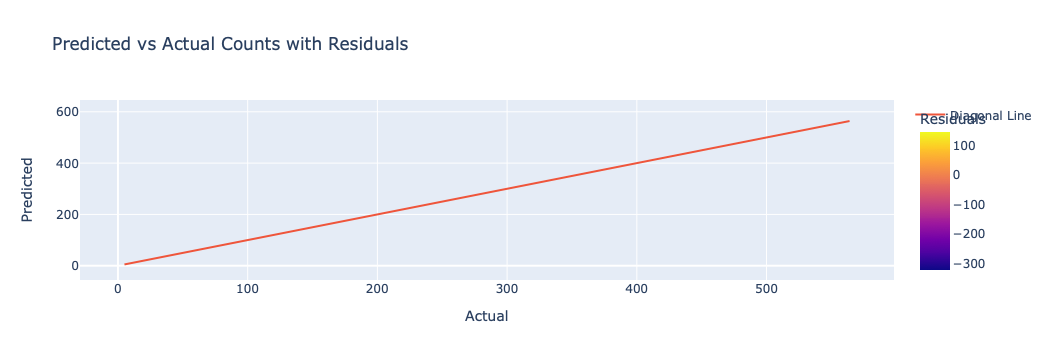

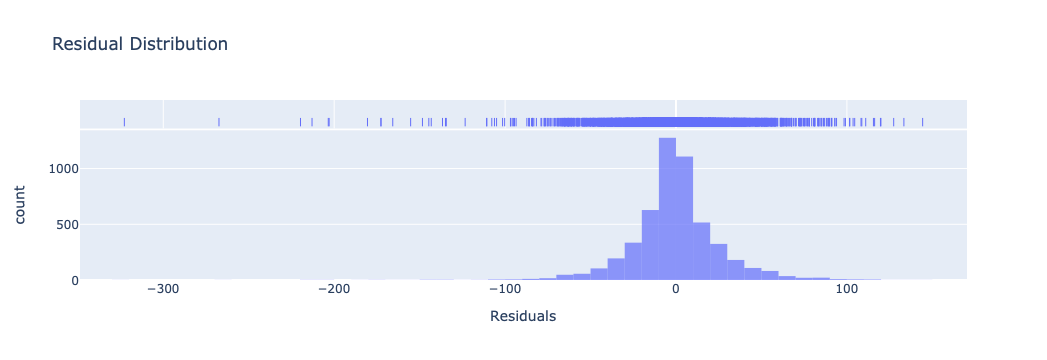

In [42]:
# create a dataframe with the actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# create a column for residuals
df['Residuals'] = df['Actual'] - df['Predicted']

# create a scatter plot with residuals
fig = px.scatter(df, x='Actual', y='Predicted', hover_name=df.index, color='Residuals',
                 title='Predicted vs Actual Counts with Residuals')

# add a diagonal line to the plot
fig.add_trace(go.Scatter(x=[df['Actual'].min(), df['Actual'].max()], y=[df['Actual'].min(), df['Actual'].max()],
                         mode='lines', name='Diagonal Line'))

# add a histogram for residuals
fig2 = px.histogram(df, x='Residuals', nbins=50, opacity=0.7, marginal='rug', title='Residual Distribution')

# display the interactive plots
fig.show()
fig2.show()

### Given the scoring objective, we can see how the R-Squared, the error-based metrics and the residual plots picture an optimal prediction. Our CatBoostRegressor model, thanks ot the feature engineering and the encoding performed, performs paritcularly well on unseen data.
### We can consider our optimized model ready to be deployed.

> Predicting unseen data

In [43]:
unseen_data.sample()

Unnamed: 0  year  month  day  hr  holiday  workingday  temp   hum  \
17055       17223  2012     12   25  12        0           0  0.32  0.76   

       windspeed  ...  temp_cat_mild  hum_cat_high  hum_cat_low  \
17055     0.0896  ...            0.0           1.0          0.0   

       hum_cat_medium  windspeed_cat_calm  windspeed_cat_moderate  \
17055             0.0                 1.0                     0.0   

       rentals_previous_hour  rentals_previous_day  rentals_previous_week  \
17055                   86.0                1019.0                21542.0   

       rentals_previous_month  
17055                121485.0  

[1 rows x 43 columns]

In [44]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 17038 to 17210
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              173 non-null    int64  
 1   year                    173 non-null    int64  
 2   month                   173 non-null    int64  
 3   day                     173 non-null    int64  
 4   hr                      173 non-null    int64  
 5   holiday                 173 non-null    int64  
 6   workingday              173 non-null    int64  
 7   temp                    173 non-null    float64
 8   hum                     173 non-null    float64
 9   windspeed               173 non-null    float64
 10  temp_hum_interaction    173 non-null    float64
 11  temp_ws_interaction     173 non-null    float64
 12  ws_hum_interaction      173 non-null    float64
 13  season_1                173 non-null    float64
 14  season_2                173 non-null

In [47]:
# Predicting the default probabilities 

target = catboost.predict(unseen_data)
target = target.round()
values = pd.DataFrame({"Month": unseen_data["month"], "Day": unseen_data["day"], "Hour": unseen_data["hr"], 
                       "Working Day": unseen_data["workingday"], "Cold Temperature": unseen_data["temp_cat_cold"],
                       "Mild Temperature": unseen_data["temp_cat_mild"], "Hot Temperature": unseen_data["temp_cat_hot"],
                       "Calm wind": unseen_data["windspeed_cat_calm"], "Moderate wind": unseen_data["windspeed_cat_moderate"],
                       "Prediction": target})

In [48]:
values

Month  Day  Hour  Working Day  Cold Temperature  Mild Temperature  \
17038     12   24    18            1               1.0               0.0   
17039     12   24    19            1               1.0               0.0   
17040     12   24    20            1               1.0               0.0   
17041     12   24    21            1               1.0               0.0   
17042     12   24    22            1               1.0               0.0   
...      ...  ...   ...          ...               ...               ...   
17206     12   31    19            1               1.0               0.0   
17207     12   31    20            1               1.0               0.0   
17208     12   31    21            1               1.0               0.0   
17209     12   31    22            1               1.0               0.0   
17210     12   31    23            1               1.0               0.0   

       Hot Temperature  Calm wind  Moderate wind  Prediction  
17038              0.0        1.0            0.0        37.0  
17039              0.0        1.0            0.0        27.0  
17040              0.0        1.0            0.0         6.0  
17041              0.0        1.0            0.0        11.0  
17042              0.0        1.0            0.0        17.0  
...                ...        ...            ...         ...  
17206              0.0        1.0            0.0       105.0  
17207              0.0        1.0            0.0        89.0  
17208              0.0        1.0            0.0        68.0  
17209              0.0        1.0            0.0        61.0  
17210              0.0        1.0            0.0        33.0  

[173 rows x 10 columns]

In [49]:
# Saving the final submission as csv

values.to_csv("24_31_Predictions.csv", index=False)

# PART III: Streamlit dashboard

### This part will be covered in the separate .py file: Group1_StreamlitSrc_Assigment2.py